## 4.3 Adjusted R Square

### 4.31 Read data into R

In [10]:
cleanbodyfat=read.csv("clean dataset.csv")
library(leaps)
library(faraway)
source("Crossvalidation.R")
n=ncol(cleanbodyfat)
X = cleanbodyfat[, 4:n]
Y = cleanbodyfat$BODYFAT

### 4.32 Check the variables chosen in each size 

Subset selection object
14 Variables  (and intercept)
          Forced in Forced out
AGE           FALSE      FALSE
WEIGHT        FALSE      FALSE
HEIGHT        FALSE      FALSE
ADIPOSITY     FALSE      FALSE
NECK          FALSE      FALSE
CHEST         FALSE      FALSE
ABDOMEN       FALSE      FALSE
HIP           FALSE      FALSE
THIGH         FALSE      FALSE
KNEE          FALSE      FALSE
ANKLE         FALSE      FALSE
BICEPS        FALSE      FALSE
FOREARM       FALSE      FALSE
WRIST         FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AGE WEIGHT HEIGHT ADIPOSITY NECK CHEST ABDOMEN HIP THIGH KNEE ANKLE
1  ( 1 ) " " " "    " "    " "       " "  " "   "*"     " " " "   " "  " "  
2  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
3  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
4  ( 1 ) " " "*"    " "    " "       " "  " "   "*"     " " " "   " "  " "  
5  ( 1 ) "*" "*"    " "    " "   

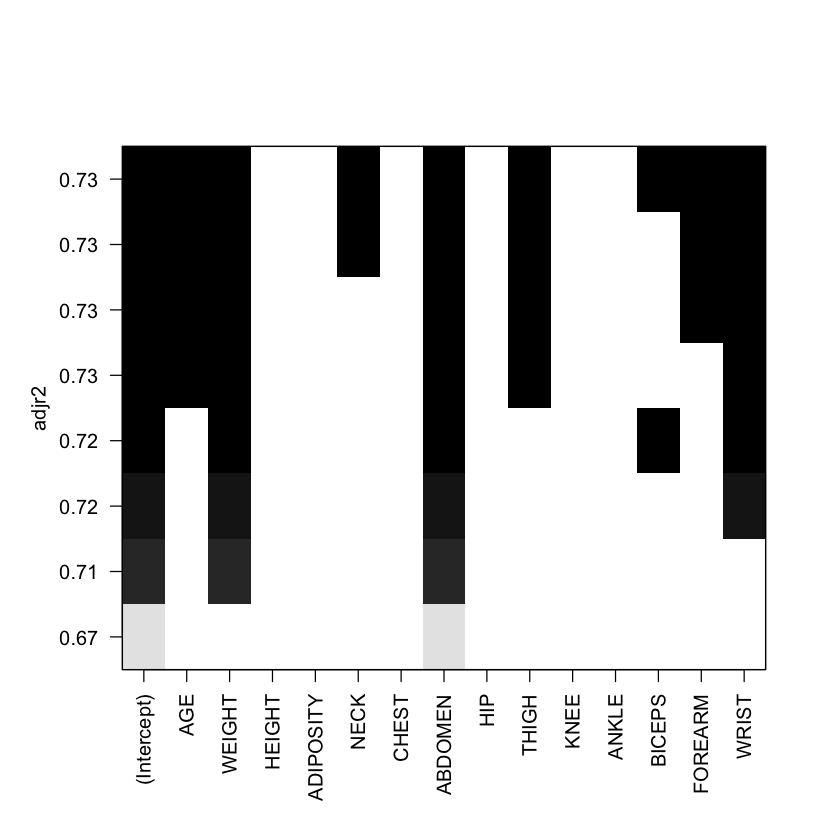

In [11]:
a<-regsubsets(X,Y)
summary(a)
plot(a,scale="adjr2")

It is similar to mallow's cp that ABDOMEN, WEIGHT, WRIST are top 3 important factors in calculating bodyfat. However, the adjusted r square increases in very slow rate when we increase the number of variables after the model BODYFAT ~ WEIGHT + ABDOMEN. 

### 4.33 Get the best number of variables under the criterion of Adjusted R Square

In [12]:
g2=leaps(X, Y, nbest = 1,method = "adjr2")
order(g2$adjr2,decreasing = TRUE)[1] #8

[1] 8

### 4.34 Calculate the MSE of each models under Cross Validation

In [13]:
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[9,]==TRUE)) + 3])
model_adjr20 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN +  HIP + THIGH + BICEPS + FOREARM + WRIST
adjr20_cv = CVMSE(cleanbodyfat, model_adjr20, 5,100)   # number of variables is 9
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[8,]==TRUE)) + 3])
model_adjr21 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + THIGH + BICEPS + FOREARM + WRIST
adjr21_cv = CVMSE(cleanbodyfat, model_adjr21, 5,100)   # number of variables is 8
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[7,]==TRUE)) + 3])
model_adjr22 = BODYFAT ~ AGE + WEIGHT + NECK + ABDOMEN + THIGH  + FOREARM + WRIST
adjr22_cv = CVMSE(cleanbodyfat, model_adjr22, 5,100)   # number of variables is 7
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[6,]==TRUE)) + 3])
model_adjr23 = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH  + FOREARM + WRIST
adjr23_cv = CVMSE(cleanbodyfat, model_adjr23, 5,100)   # number of variables is 6
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[5,]==TRUE)) + 3])
model_adjr24 = BODYFAT ~ AGE + WEIGHT + ABDOMEN + THIGH + WRIST
adjr24_cv = CVMSE(cleanbodyfat, model_adjr24, 5,100)   # number of variables is 5
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[4,]==TRUE)) + 3])
model_adjr25 = BODYFAT ~ WEIGHT + ABDOMEN + BICEPS + WRIST
adjr25_cv = CVMSE(cleanbodyfat, model_adjr25, 5,100)   # number of variables is 4
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[3,]==TRUE)) + 3])
model_adjr26 = BODYFAT ~ WEIGHT + ABDOMEN +  WRIST
adjr26_cv = CVMSE(cleanbodyfat, model_adjr26, 5,100)   # number of variables is 3
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[2,]==TRUE)) + 3])
model_adjr27 = BODYFAT ~ WEIGHT + ABDOMEN
adjr27_cv = CVMSE(cleanbodyfat, model_adjr27, 5,100)   # number of variables is 2
print(colnames(cleanbodyfat)[as.numeric(which(g2$which[1,]==TRUE)) + 3])
model_adjr28 = BODYFAT ~ ABDOMEN 
adjr28_cv = CVMSE(cleanbodyfat, model_adjr28, 5,100)   # number of variables is 1
adjr2_cv=c(adjr20_cv,adjr21_cv,adjr22_cv,adjr23_cv,adjr24_cv,adjr25_cv,adjr26_cv,adjr27_cv,adjr28_cv)

[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "HIP"     "THIGH"   "BICEPS" 
[8] "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "BICEPS"  "FOREARM"
[8] "WRIST"  
[1] "AGE"     "WEIGHT"  "NECK"    "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "FOREARM" "WRIST"  
[1] "AGE"     "WEIGHT"  "ABDOMEN" "THIGH"   "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "BICEPS"  "WRIST"  
[1] "WEIGHT"  "ABDOMEN" "WRIST"  
[1] "WEIGHT"  "ABDOMEN"
[1] "ABDOMEN"


### 4.35 Plot the MSE and Adjusted R Square under differernt number of variables

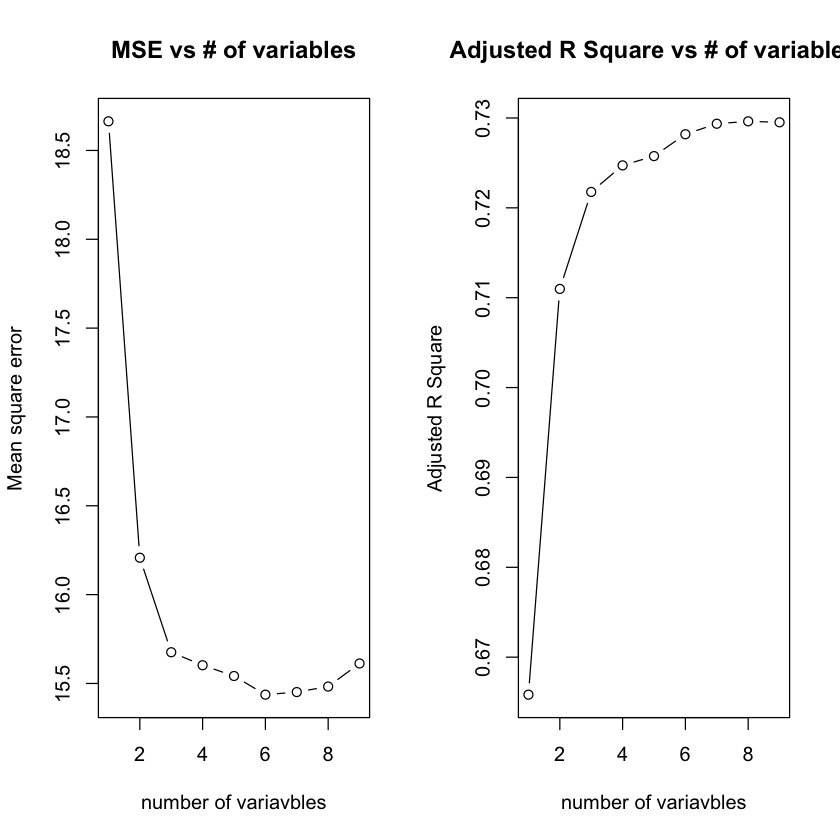

In [14]:
par(mfrow=c(1,2))
plot(x=9:1,adjr2_cv,xlab = "number of variavbles",ylab="Mean square error",type = "b",main = "MSE vs # of variables")
plot(x=1:9,g2$adjr2[1:9],xlab = "number of variavbles",ylab="Adjusted R Square",type = "b",main = "Adjusted R Square vs # of variables")

### 4.26 Summary under the criterion of Mallow's cp

After plotting the mean square errors after cross validation and the adjusted r square whose number of variables vary from 1 to 9, we think 2 has met the requirement of enough accuracy of the model. The model after the criterion of Adjusted R Square is BODYFAT  ~  WEIGHT + ABDOMEN.

### 4.27 Conclusion

In [15]:
lm(BODYFAT  ~  WEIGHT + ABDOMEN,data = cleanbodyfat)


Call:
lm(formula = BODYFAT ~ WEIGHT + ABDOMEN, data = cleanbodyfat)

Coefficients:
(Intercept)       WEIGHT      ABDOMEN  
   -41.9007      -0.1230       0.8956  


#### BODYFAT  =  -0.1230*WEIGHT + 0.8956*ABDOMEN -41.9007